# Importing Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

# Importing Dataset

In [157]:
accidents_df = pd.read_csv('road-accidents.csv', header=9, delimiter='|')
accidents_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [158]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [159]:
rows, columns = accidents_df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 51
Number of columns: 5


# Create a textual and a graphical summary of the data

In [160]:
accidents_df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


<Figure size 864x360 with 0 Axes>

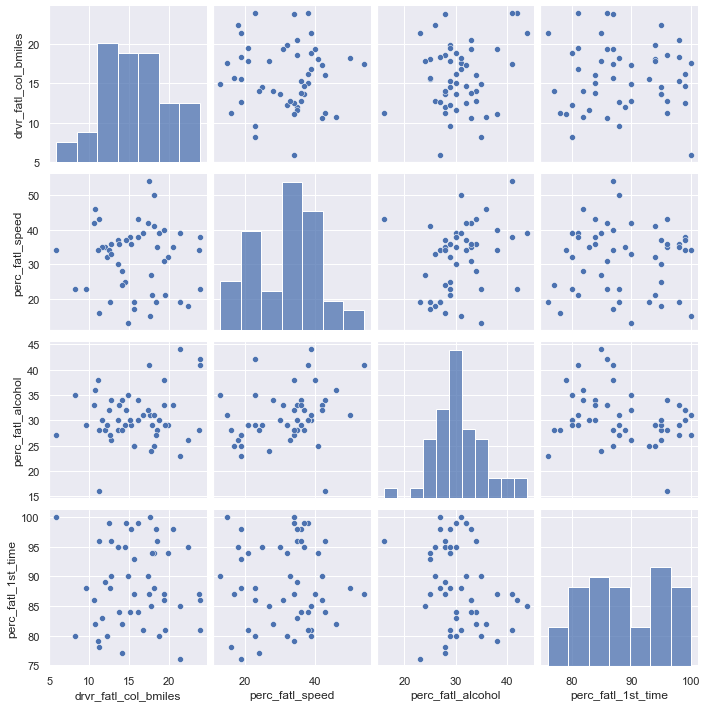

In [161]:
plt.figure(figsize=(12, 5))
sns.pairplot(accidents_df)

# Quantify the association of features and accidents

In [162]:
matrix = accidents_df.corr()
matrix

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


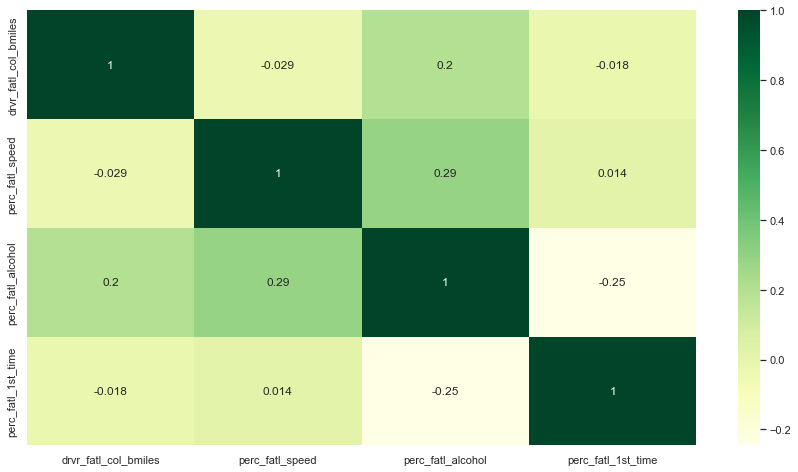

In [163]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix, annot=True, cmap='YlGn')
plt.show()

# Fit a multivariate linear regression

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
linear_regression = LinearRegression()

In [166]:
accidents_df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [167]:
X = accidents_df.iloc[:, 2:5]
y = accidents_df['drvr_fatl_col_bmiles']

In [168]:
y.head()

0    18.8
1    18.1
2    18.6
3    22.4
4    12.0
Name: drvr_fatl_col_bmiles, dtype: float64

In [170]:
x.head()

,35,28,96
0,18,26,95
1,35,28,89
2,37,28,95
3,46,36,82
4,38,30,99


# Perform PCA on standardized data

In [171]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [174]:
X_train.head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
41,31,33,86
27,13,35,90
35,28,34,82
34,23,42,86
7,38,30,99


In [175]:
y_test.head()

29    11.6
11    17.5
10    15.6
22    14.1
2     18.6
Name: drvr_fatl_col_bmiles, dtype: float64

In [176]:
linear_reg = linear_regression.fit(X_train, y_train)
linear_reg

LinearRegression()

In [177]:
prediction=linear_reg.predict(X_test)
prediction

array([15.73925232, 16.12193976, 15.80236078, 16.05287496, 15.40292435,
       15.75123639, 15.86813342, 15.78319857, 17.16238394, 15.45941962,
       15.6905138 ])

In [178]:
from sklearn.metrics import r2_score

In [179]:
score = r2_score(y_test, prediction)

In [180]:
score

0.11654346208632693

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scalar=StandardScaler()

In [185]:
scaled_features = scalar.fit_transform(X)

In [186]:
scaled_features

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

In [187]:
from sklearn.decomposition import PCA

In [188]:
pca = PCA()
pca

PCA()

In [189]:
pca.fit(scaled_features)

PCA()

Cumulative variance of the first two principal components is 0.7947


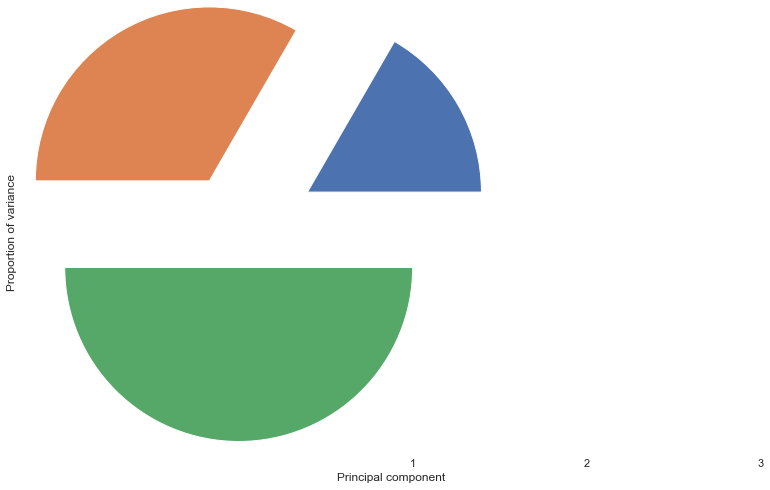

In [200]:
plt.pie(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance')
plt.xticks([1, 2, 3])
two_first_comp_var_exp = pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

print("Cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

# Visualize the first two principal components

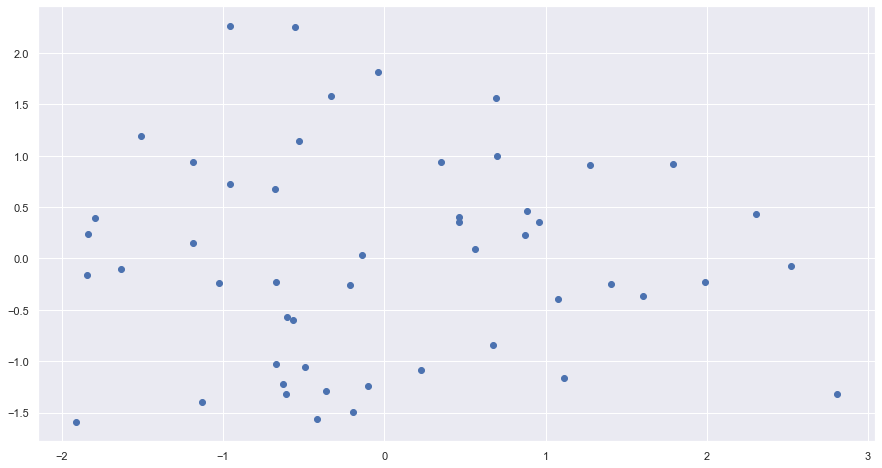

In [219]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(scaled_features)
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]
plt.scatter(p_comp1,p_comp2)

# Find clusters of similar states in the data

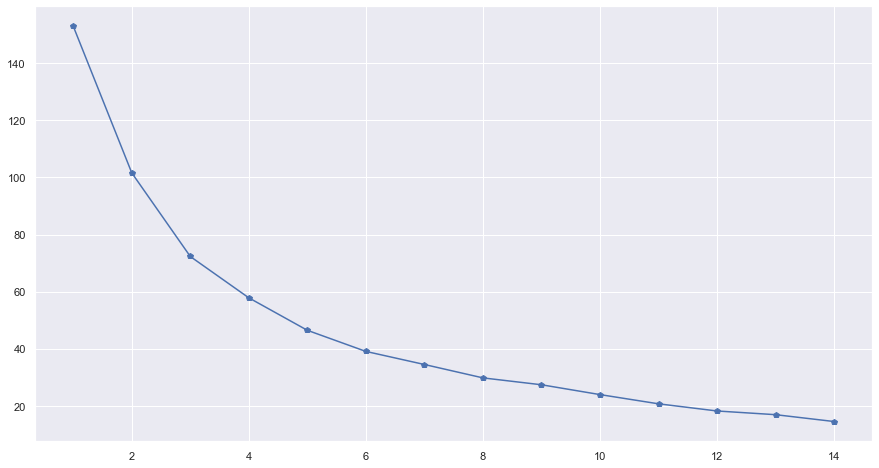

In [213]:
from sklearn.cluster import KMeans

ks = range(1, 15)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=10)
    km.fit_transform(scaled_features)
    inertias.append(km.inertia_)
    
plt.plot(list(ks), inertias, marker='p')

# KMeans to visualize clusters in the PCA scatter plot

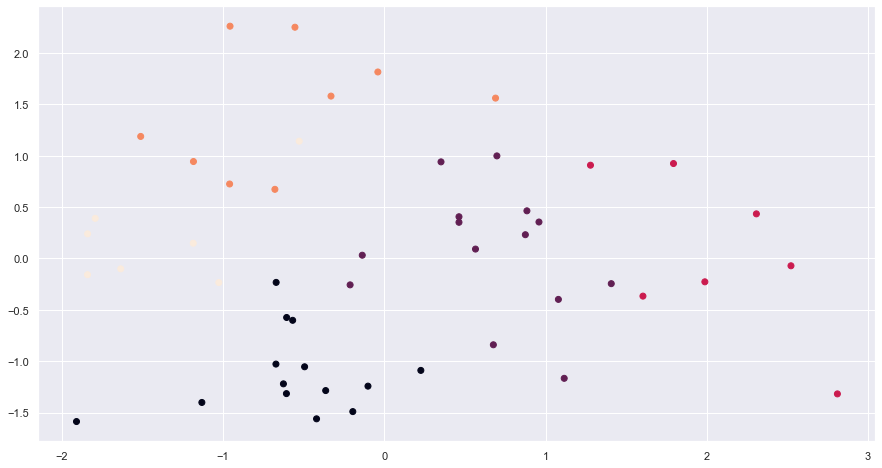

In [218]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(scaled_features)
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

# Visualize the feature differences between the clusters

In [220]:
accidents_df['cluster'] =km.labels_
melt_car = pd.melt(accidents_df ,id_vars='cluster' ,var_name='measurement', value_name='percent',value_vars=['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time'] )
melt_car.head(5)

,cluster,measurement,percent
0,1,perc_fatl_speed,39
1,0,perc_fatl_speed,41
2,0,perc_fatl_speed,35
3,4,perc_fatl_speed,18
4,1,perc_fatl_speed,35


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percent', ylabel='measurement'>

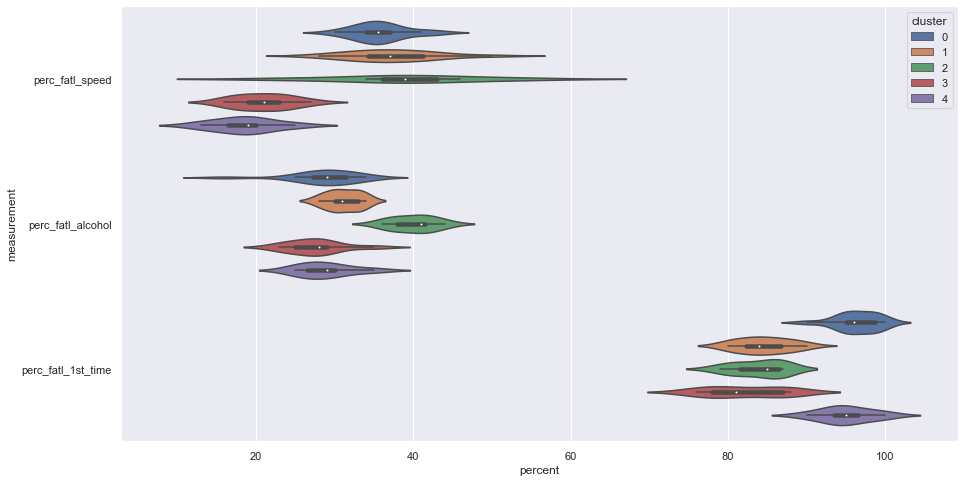

In [221]:
sns.violinplot(melt_car['percent'], melt_car['measurement'], hue=melt_car['cluster'])

# Compute the number of accidents within each cluster

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time    cluster  million_miles_annually  \
count            51.00000  51.000000               51.000000   
mean             88.72549   1.627451            57851.019608   
std               6.96011   1.413659            59898.414088   
min              76.00000   0.000000             3568.000000   
25%              83.50000   0.000000            17450.000000   
50%         

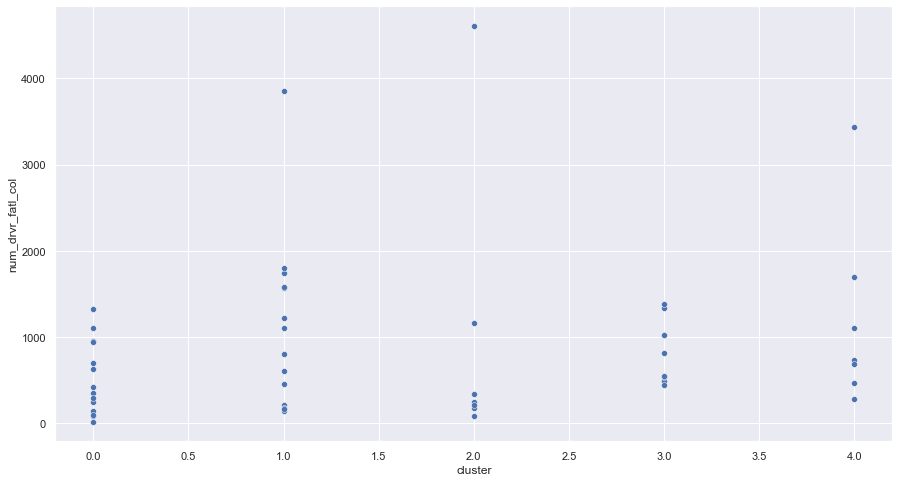

In [229]:
miles_driven = pd.read_csv('miles-driven.csv', sep='|')
car_acc_miles = pd.merge(accidents_df, miles_driven, on='state')
car_acc_miles['num_drvr_fatl_col']=(car_acc_miles['drvr_fatl_col_bmiles']/1000)*car_acc_miles['million_miles_annually']
sns.scatterplot(x=car_acc_miles['cluster'], y=car_acc_miles['num_drvr_fatl_col'], data=car_acc_miles, estimator=sum, ci=None)
print(car_acc_miles.describe())
count_mean_sum = car_acc_miles.groupby('cluster').num_drvr_fatl_col.agg(['count','mean','sum'])
print(count_mean_sum)